### Video Game Market Analysis
### Objective:
An online video game store needs to analyze the gaming market to:

Identify key factors contributing to a game's success.
Define user profiles for different regions.
Test business hypotheses to predict potentially popular games and optimize marketing strategies for business growth.
### Dataset Information:
The data has been collected from public sources and is stored in games.csv.
The dataset covers the period from 1983 to 2016, but 2016 data may be incomplete.

### Dataset Description (games.csv):
Name — Title of the game
Platform — Gaming platform (e.g., PlayStation, Xbox, PC)
Year_of_Release — Release year of the game
Genre — Game genre (e.g., Action, RPG, Strategy)
NA_sales — Sales in North America (millions of dollars)
EU_sales — Sales in Europe (millions of dollars)
JP_sales — Sales in Japan (millions of dollars)
Other_sales — Sales in other regions (millions of dollars)
Critic_Score — Critic ratings (0 to 100)
User_Score — User ratings (0 to 10)
Rating — ESRB rating (Entertainment Software Rating Board), which categorizes games based on age suitability.

In [75]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df = pd.read_csv('Video_Games_Sales.csv')

In [77]:
df.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:

columns_to_drop = ["Publisher", "Global_Sales", "Critic_Count", "User_Count", "Developer"]
df.drop(columns=columns_to_drop, inplace=True)


In [79]:
df.head(10)



,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10015 non-null  object 
 10  Rating           9950 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Detailed Analysis of the Dataset
The dataset consists of 11 columns with two data types:

Object (Categorical) columns: 5 columns
Float64 (Numerical) columns: 6 columns

### Column Descriptions:
Name — Title of the game
Platform — Gaming platform (e.g., Xbox, PlayStation, PC)
Year_of_Release — Release year of the game
Genre — Game genre (e.g., Action, RPG, Strategy)
NA_sales — Sales in North America (millions of dollars)
EU_sales — Sales in Europe (millions of dollars)
JP_sales — Sales in Japan (millions of dollars)
Other_sales — Sales in other regions (millions of dollars)
Critic_Score — Critic ratings (0 to 100)
User_Score — User ratings (0 to 10)
Rating — ESRB rating (Entertainment Software Rating Board) – determines the age-appropriateness of games

### Initial Observations & Issues:
Missing values detected in some columns, indicating incomplete data.
Column names need cleaning for consistency.
Key columns for hypothesis testing:
Genre, Platform, Year_of_Release, Regional Sales
These help analyze how user preferences change over time and determine user demographics per region.
Critic_Score, User_Score, Rating are crucial for testing hypotheses on how ratings influence game sales.

### Step 2: Data Preprocessing
Rename columns for consistency.
Convert data types to appropriate formats.
Handle missing values (fill in where possible).
Check for duplicates and remove if necessary.
Calculate total sales across all regions and store them in a new column (Global_Sales).


In [81]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

The column names are currently capitalized, which is not convenient for data manipulation. To improve accessibility and consistency, we will rename the columns to a more Python-friendly format (lowercase with underscores).

In [82]:


df = df.rename(columns=lambda x: x.lower())

In [83]:
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8582
user_score         6704
rating             6769
dtype: int64

First, we will examine the rows where the 'name' column contains missing values. This step helps us understand the extent of missing data and decide on the best approach for handling it.

In [85]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Removing Irrelevant Rows with Missing Values
There are only two rows where the 'name' column is missing.
These rows also contain missing values in other critical columns: 'genre', 'critic_score', 'user_score', and 'rating'.
Both rows belong to games released in 1993 on the GEN platform.
Since these rows lack essential information and are unlikely to impact the overall analysis, we will remove them from the dataset.

In [86]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Now that the missing values in the 'name' column have been removed, we will focus on handling missing values in 'year_of_release'.

In [87]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16374,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Handling Missing 'year_of_release' Values
There are 269 games with missing release year data.
Some game titles contain the release year in their names.
We can use this information to fill in missing values where possible.

In [88]:
idx_year = {}  # Create an empty dictionary

# Iterate through rows with missing 'year_of_release'
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # Split the game title into words
        if item == row.name.split(' ')[-1]:  # Take the last word from the list
            try:  # Check if the last word is a number
                if len(item) == 2 or len(item) == 4:  # Verify its length
                    item = int(item)  # Convert to integer
                    if item < 21:  # Convert 2-digit years from the 21st century
                        item += 2000
                    elif item > 80 and item < 100:  # Convert 2-digit years from the 20th century
                        item += 1900
                    if item >= 1980:  # Ensure the year is within the dataset range (1980+)
                        idx_year[row.Index] = item
            except:  # If the last word is not a number, continue iteration
                continue

# Print the resulting dictionary
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')


index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8918  | year: 2005
index: 13195 | year: 2011
index: 13929 | year: 2006
index: 15953 | year: 2008
index: 16079 | year: 2007
index: 16374 | year: 2008


Now, we will replace the missing values in the 'year_of_release' column using the extracted years from game titles.

In [89]:
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16349,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Now, we have 249 games without a release year. This is fewer than in the previous check, confirming that replacements were successfully applied.

Finding the release years for the remaining 249 rows could be done through web scraping, but at this stage, we consider it reasonable to simply remove these rows and continue working with the available dataset.

Since 249 rows account for only about 1.49% of the total data, their removal should not significantly impact the analysis. However, if we later find that we need more data, we can revisit the idea of web scraping to retrieve the missing information. 

In [90]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8470
user_score         6613
rating             6685
dtype: int64

In [91]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16463,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16464,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16465,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16466,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We are missing critic scores for 8,466 games, which accounts for approximately 51% of all games.

To understand the impact of these missing values, we will analyze the correlation between Critic Scores and other available data:

Year of Release – Were critics more favorable in certain years?
Sales in North America (NA_sales)
Sales in Europe (EU_sales)
Sales in Japan (JP_sales)
Sales in Other Regions (Other_sales)
Total Global Sales (Global_sales)
To quantify these relationships, we will calculate the Pearson correlation coefficient between 'year_of_release' and 'critic_score'.

In [92]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889768

Correlation Analysis Results
The correlation between Critic Scores and other variables is very weak, indicating almost no relationship between them.

Next Step: Calculating Global Sales
To proceed, we will calculate the total global sales for each game by summing up sales across all regions:

In [93]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16464,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16465,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16466,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Now, we will calculate the Pearson correlation coefficient between North American sales (NA_sales) and Critic Scores (Critic_Score) to determine if higher critic ratings influence game sales in this region.

In [94]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345798

Since the correlation between North American Sales (NA_sales) and Critic Scores (Critic_Score) was weak, we now compute the Pearson correlation coefficient between European Sales (EU_sales) and Critic Scores.

In [95]:
df['eu_sales'].corr(df['critic_score'])

0.22133464515023293

Since the correlation between Critic Scores and sales in North America and Europe was weak, we now calculate the Pearson correlation coefficient between Japanese Sales (JP_sales) and Critic Scores (Critic_Score).

In [96]:
df['jp_sales'].corr(df['critic_score'])


0.15319263872334984

Since the correlation between Critic Scores and sales in North America, Europe, and Japan was very weak, we now compute the Pearson correlation coefficient between sales in other regions (Other_sales) and Critic Scores (Critic_Score).

In [97]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301803

Since the correlation between Critic Scores and sales in North America, Europe, Japan, and other regions was very weak, we now compute the Pearson correlation coefficient between total global sales (global_sales) and Critic Scores (Critic_Score).

In [98]:
df['global_sales'].corr(df['critic_score'])

0.2458435644758743

In all cases, we observed either very weak or weak correlations between Critic Scores and the analyzed features:

Minimum correlation: Year of Release vs. Critic Score → 0.010
Maximum correlation: Global Sales vs. Critic Score → 0.245
Since the correlations are too weak, it is not appropriate to average Critic Scores based on any of these features to fill in missing values.

In [99]:
df.user_score.value_counts()

user_score
tbd    2379
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

The most frequently occurring value in the 'user_score' column is not a numerical rating, but the string 'tbd' (short for "to be defined"). This means the user score has not yet been determined for those games.

In [100]:
df = df.replace('tbd', np.nan)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8470
user_score         8992
rating             6685
global_sales          0
dtype: int64

In [101]:
df['user_score'] = df.user_score.astype('float')
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
global_sales       float64
dtype: object

After replacing 'tbd' values and handling missing data, the 'user_score' column's data type has been successfully converted from object to float64.

This allows us to perform mathematical operations on user scores, making it possible to conduct further analysis.

In [102]:
df['year_of_release'].corr(df['user_score'])

-0.26826355995896833

The correlation between 'year_of_release' and 'user_score' is weakly negative, indicating that:

There is a slight tendency for newer games to receive lower user scores compared to older games.
However, the relationship is not strong enough to draw definitive conclusions.

In [103]:
df['na_sales'].corr(df['user_score'])

0.08570745189151244

The correlation between 'NA_sales' and 'user_score' is very weak, indicating that user ratings have little to no impact on game sales in North America.

In [104]:
df['eu_sales'].corr(df['user_score'])

0.05526729130424239

The correlation between 'EU_sales' and 'user_score' is very weak, suggesting that user ratings have little to no impact on game sales in Europe, similar to the trend observed in North America.

In [105]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268779

The correlation between 'JP_sales' and 'user_score' is very weak, indicating that user ratings have little to no effect on game sales in Japan, similar to North America and Europe.

In [106]:
df['other_sales'].corr(df['user_score'])

0.057011543401208904

The correlation between 'Other_sales' and 'user_score' is very weak, indicating that user ratings do not significantly impact sales in smaller or emerging gaming markets, similar to trends observed in North America, Europe, and Japan.

In [107]:
df['global_sales'].corr(df['user_score'])

0.08797432650715238

The correlation between 'global_sales' and 'user_score' is very weak, indicating that user ratings do not have a significant impact on worldwide game sales, similar to trends observed in individual regions.

In [108]:
df['critic_score'].corr(df['user_score'])

0.5792013058120697

The correlation between 'global_sales' and 'user_score' is very weak, indicating that user ratings do not have a significant impact on worldwide game sales, similar to trends observed in individual regions.

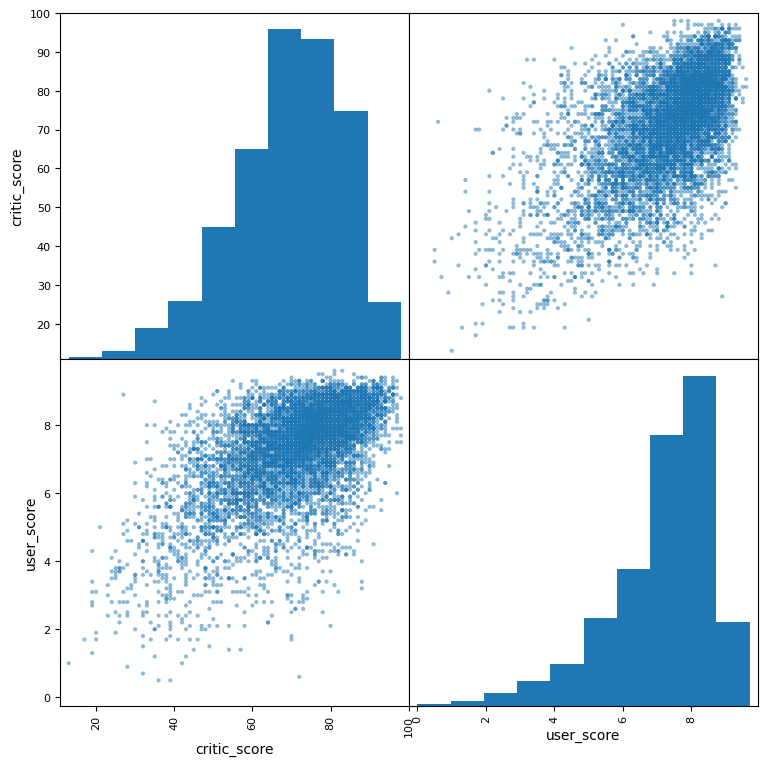

In [109]:
pd.plotting.scatter_matrix(df[['critic_score', 'user_score']], figsize=(9,9));
plt.savefig("plots/critic_user.png", dpi=300, bbox_inches='tight')

Final Correlation Analysis Conclusion
All analyzed features showed weak or very weak correlations with user scores.
The only moderate correlation was between Critic Scores and User Scores:
Minimum correlation: EU Sales vs. User Score → 0.055
Maximum correlation: Critic Score vs. User Score → 0.579
Since no strong correlations were found, averaging user scores based on these features is not a suitable method for filling missing values.

In [110]:
df['rating'] = df['rating'].fillna('unknown')
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8470
user_score         8992
rating                0
global_sales          0
dtype: int64

Summary of Missing Values Handling:
'name' column:

Only two missing values, which were likely due to data entry issues.
Since this was not significant, the missing values were removed.
'year_of_release' column:

Missing values were not substantial.
Some were extracted from game titles, while others were dropped due to their minimal impact on the overall analysis.
'critic_score' and 'user_score' columns:

Missing values accounted for nearly half the dataset and were often missing together.
This suggests that the ratings were never recorded or not included in the dataset.
Attempts to fill them using sales correlations were unsuccessful due to weak correlations.
As a result, missing values were retained to avoid distorting the analysis.
'rating' column:

Missing values were replaced with 'unknown' since ratings are a nominal variable, and it was impossible to infer them accurately.
Patterns in Missing Data:

Many missing ratings and scores were associated with:
Older games from the 1980s, when the gaming industry was less structured.
Newer games, which may not have accumulated enough ratings yet.
More than 2,000 occurrences of 'tbd' were handled accordingly.
Total Global Sales Calculation:

A new column 'global_sales' was created by summing sales from all regions.

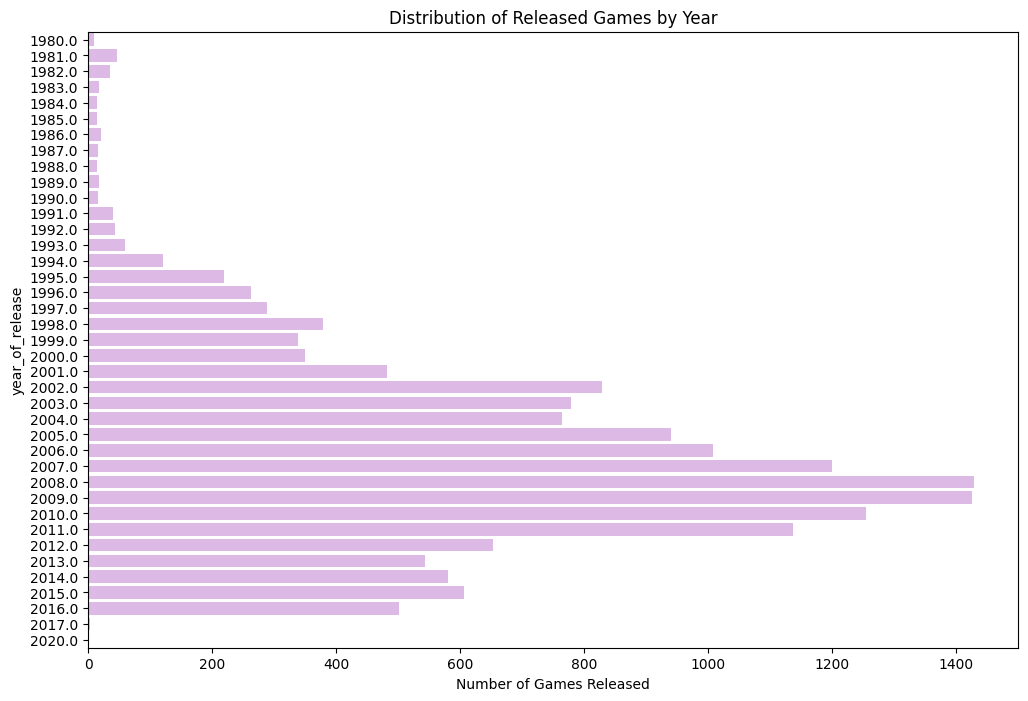

In [111]:
# Group data by year and count the number of games released per year
games_per_year = df.groupby('year_of_release', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'games_number'})  # Rename column for clarity

# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
ax = sns.barplot(y=games_per_year.year_of_release,  # Y-axis: Year of release
                 x=games_per_year.games_number,  # X-axis: Number of games released
                 orient='h',  # Horizontal bars
                 color='#e2b2ed')  # Set bar color

# Labels and title
plt.xlabel('Number of Games Released')  
plt.title('Distribution of Released Games by Year')

plt.savefig("plots/games_per_year.png", dpi=300, bbox_inches='tight')


Game Release Trends Over Time
The majority of games were released during the first decade of the 21st century.
The peak years for game releases were 2008–2009.
After 2011, there was a significant decline in the number of released games.
Possible Reasons for the Decline After 2011:
Rise of social media gaming (e.g., Facebook games gained popularity).
Shift towards mobile gaming instead of traditional console/PC games.


In [112]:
games_per_year['prcnt'] = 100 * games_per_year.games_number / games_per_year.games_number.sum()
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

games_per_year

,year_of_release,games_number,prcnt,prcnt_sum
0,1980.0,9,0.054651,0.054651
1,1981.0,46,0.279330,0.333981
2,1982.0,36,0.218606,0.552587
3,1983.0,17,0.103231,0.655817
4,1984.0,14,0.085013,0.740831
5,1985.0,14,0.085013,0.825844
6,1986.0,21,0.127520,0.953364
7,1987.0,16,0.097158,1.050522
8,1988.0,15,0.091086,1.141608
9,1989.0,17,0.103231,1.244838


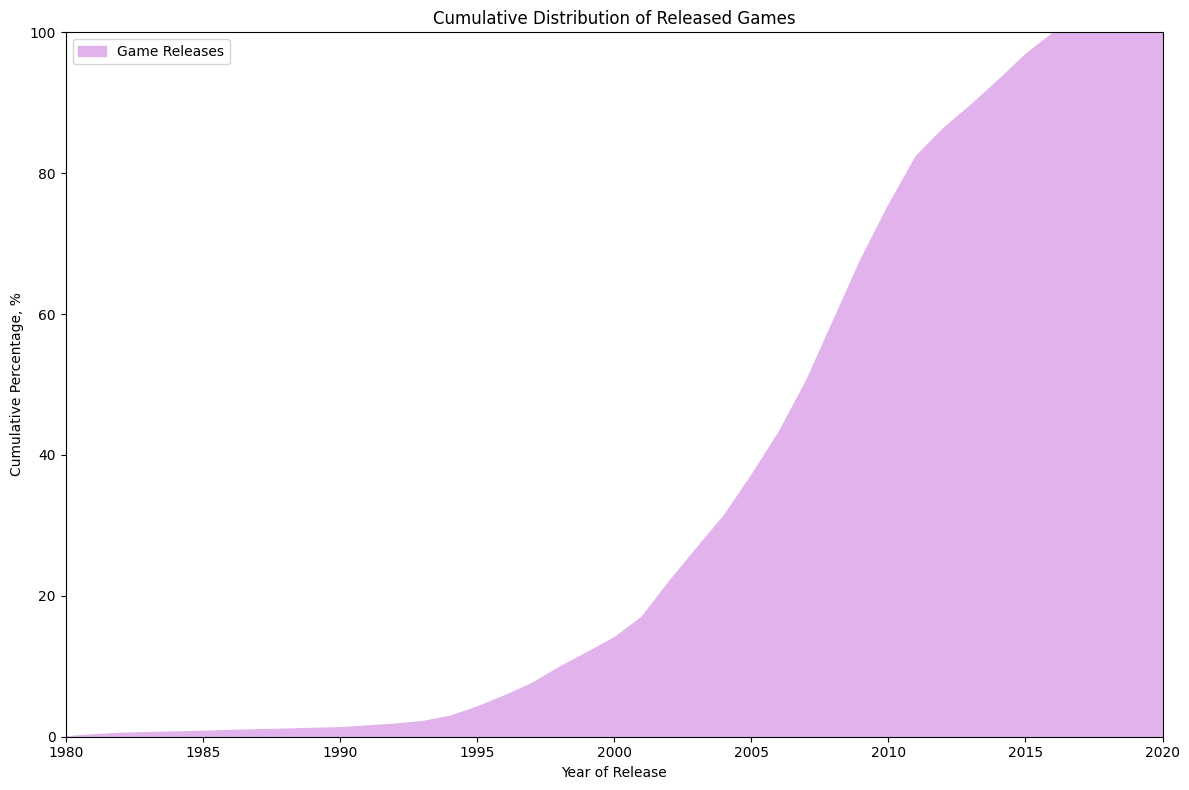

In [113]:
# Convert data to NumPy arrays for plotting
rnd = np.asarray(games_per_year.loc[:, 'prcnt_sum'].to_list())  # Cumulative percentage
yrs = np.asarray(games_per_year.loc[:, 'year_of_release'].to_list())  # Years

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot cumulative percentage as an area plot
ax.stackplot(yrs, rnd, labels=['Game Releases'], color='#e2b2ed')

# Title and labels
ax.set_title('Cumulative Distribution of Released Games')  
ax.legend(loc='upper left')  # Add legend
ax.set_xlabel('Year of Release')  
ax.set_ylabel('Cumulative Percentage, %')  

# Set axis limits
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])  # X-axis range from first to last year
ax.set_ylim(ymin=0, ymax=100)  # Y-axis range from 0% to 100%

fig.tight_layout()  # Adjust layout for better readability

plt.show();  # Display plot


Cumulative Distribution of Released Games
From 1983 to 1999, only ~11% of all games were released.
In contrast, from 2000 to 2016, the remaining 89% of games were launched.
Half of all games in the dataset were released between 2007 and 2016.
Key Takeaways:
The 1980s and 1990s data has low representation in the dataset.
The most relevant period for analysis is 2000 onwards, as the majority of games were released after this time.

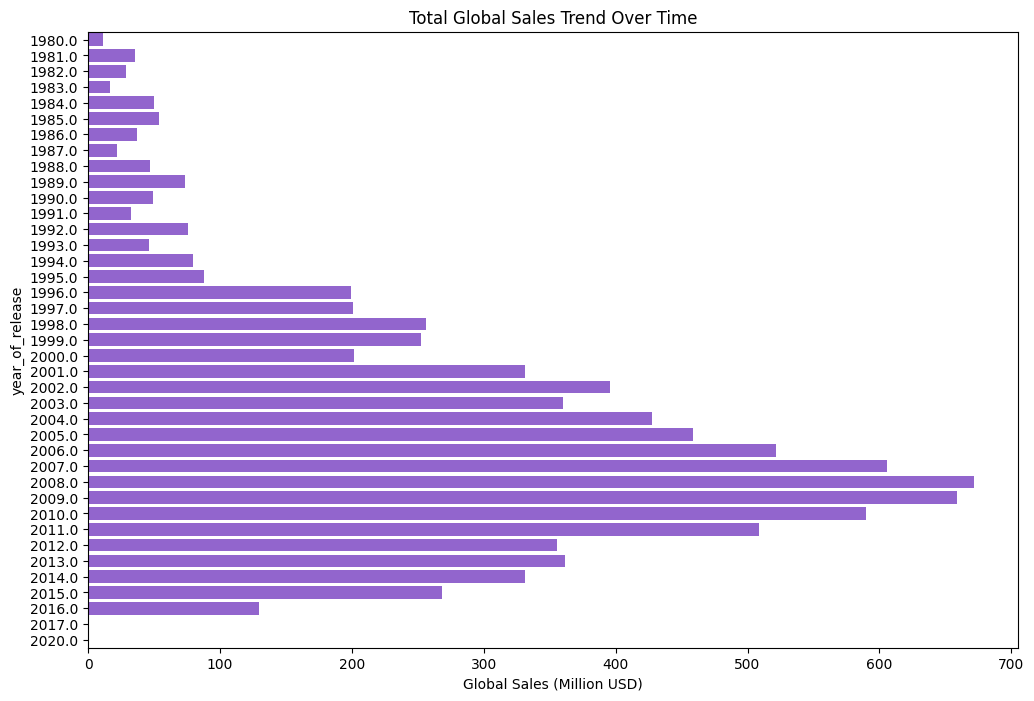

In [114]:
df_sales = df.groupby('year_of_release', as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)
plt.figure(figsize=(12, 8))  # Set figure size

# Create a horizontal bar plot
ax = sns.barplot(y=df_sales.year_of_release,  # Y-axis: Year of release
                 x=df_sales.global_sales,  # X-axis: Total global sales
                 orient='h',  # Horizontal orientation
                 color='#9054DE');  # Set bar color

# Labels and title
plt.xlabel('Global Sales (Million USD)')  # X-axis label
plt.title('Total Global Sales Trend Over Time');  # Chart title



Total Sales Trends vs. Game Releases
The total sales trend closely follows the game release trend.
Peak sales occurred in 2008–2009, aligning with the peak in game releases.
After 2009, sales declined back to early 2000s levels, reflecting a maturing industry.

In [115]:
plt_sales = df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

plt_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,803.08
15,PS,729.04
18,PS4,314.18
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


<Figure size 1200x800 with 0 Axes>

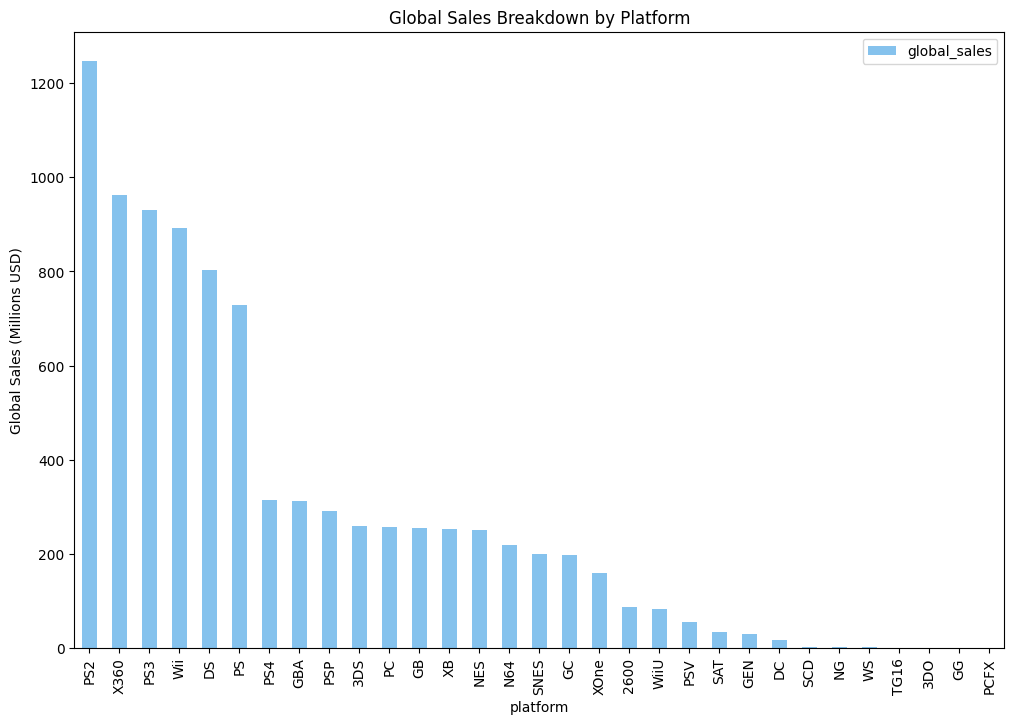

In [116]:
plt.figure(figsize=(12, 8))  # Set figure size

# Create a bar plot showing total sales per platform
plt_sales.plot(x='platform',  # X-axis: Platform names
               y='global_sales',  # Y-axis: Total global sales
               kind='bar',  # Bar chart type
               figsize=(12, 8),  # Set figure size
               title='Global Sales Breakdown by Platform',  # Chart title
               color='#85c2ed');  # Set bar color

# Label the Y-axis
plt.ylabel('Global Sales (Millions USD)');


Global Sales Leaders by Platform
The bar chart clearly highlights the top-performing platforms in terms of total global sales:

Top 6 highest-selling platforms:
PS2, X360, PS3, Wii, DS, and PS1
These platforms outsell the next-highest platform (PS4) by 2-4 times.
These top platforms are the main candidates for further detailed analysis.

In [117]:
platforms_above_median = []  # Create an empty list to store selected platforms

# Iterate through the DataFrame
for row in plt_sales.itertuples():  
    if row.global_sales > plt_sales.global_sales.median():  # Compare sales with the median
        platforms_above_median.append(row.platform)  # Add platform to the list

# Print the selected platforms
platforms_above_median  


['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

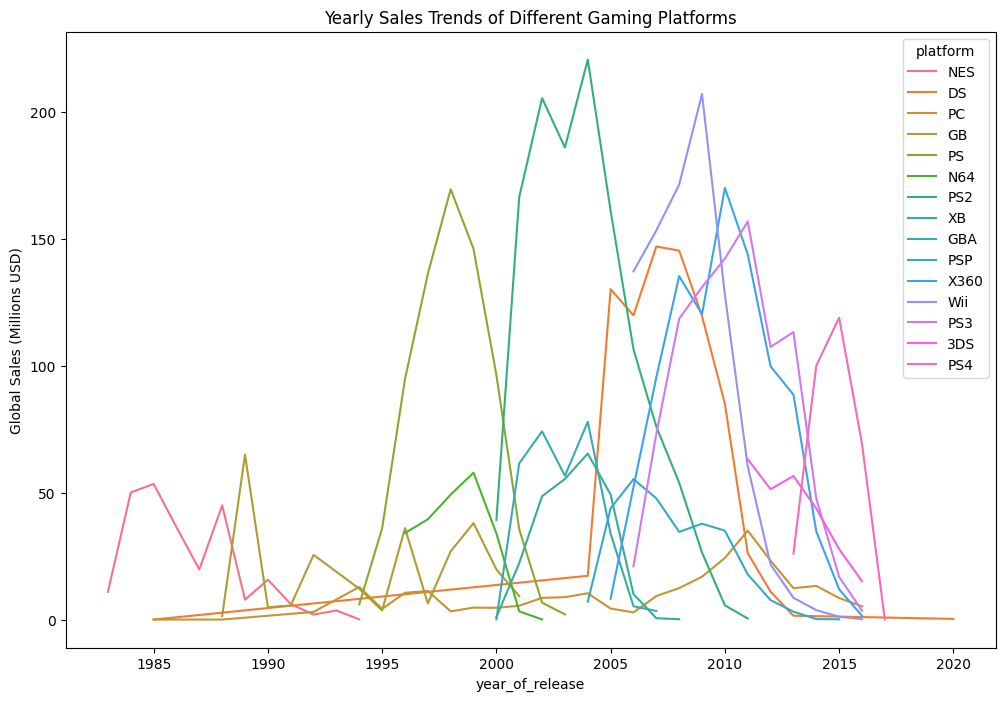

In [118]:
plt_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))  

# Create a line plot showing yearly global sales trends by platform
sns.lineplot(x=plt_sales_year.year_of_release,  # X-axis: Year of release
             y=plt_sales_year.global_sales,  # Y-axis: Global sales
             hue=plt_sales_year.platform);  # Different lines for each platform

# Set labels and title
plt.ylabel('Global Sales (Millions USD)')  
plt.title('Yearly Sales Trends of Different Gaming Platforms');  


Now, we will create a distribution plot to analyze the lifespan of gaming platforms.

This will help us:

Understand how long platforms stay active in the market.
Identify short-lived vs. long-lasting plat

Text(-7.902777777777779, 0.5, 'Platform Lifespan (Years)')

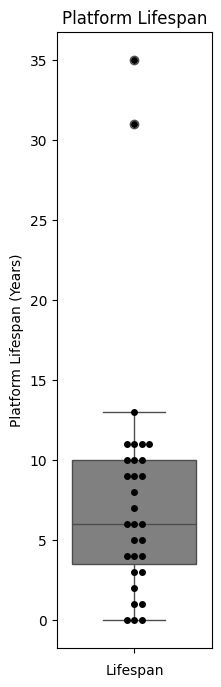

In [119]:
# Calculate the lifespan of each platform
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

# Set figure size and layout
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(2, 8))  

# Box plot to show platform lifespan distribution
sns.boxplot(y=life_span, color='grey', ax=ax1)  

# Swarm plot overlay to show individual data points
sns.swarmplot(y=life_span, color='black')  

# Set labels and title
ax1.set_title('Platform Lifespan')  
ax1.set_xlabel('Lifespan')  
ax1.set_ylabel('Platform Lifespan (Years)')  


The box plot reveals two outliers, indicating platforms that lasted significantly longer or shorter than average.
The majority of platforms fall within the interquartile range (IQR), suggesting a consistent life cycle trend.
Median lifespan = 6 years, meaning most platforms remain active for about 6 years before being replaced by newer technologies.

In [120]:
life_span.describe()

count    31.000000
mean      7.903226
std       7.721636
min       0.000000
25%       3.500000
50%       6.000000
75%      10.000000
max      35.000000
Name: year_of_release, dtype: float64

Refining Platform Selection Criteria
The average platform lifespan is 6 years, with exceptions for PC and DS, which have lasted significantly longer.
PS2, the all-time sales leader, had its last recorded sales in 2011, indicating it is no longer relevant for current market trends.
Selecting platforms based on total historical sales would distort our analysis, as it would favor older platforms that are no longer active.

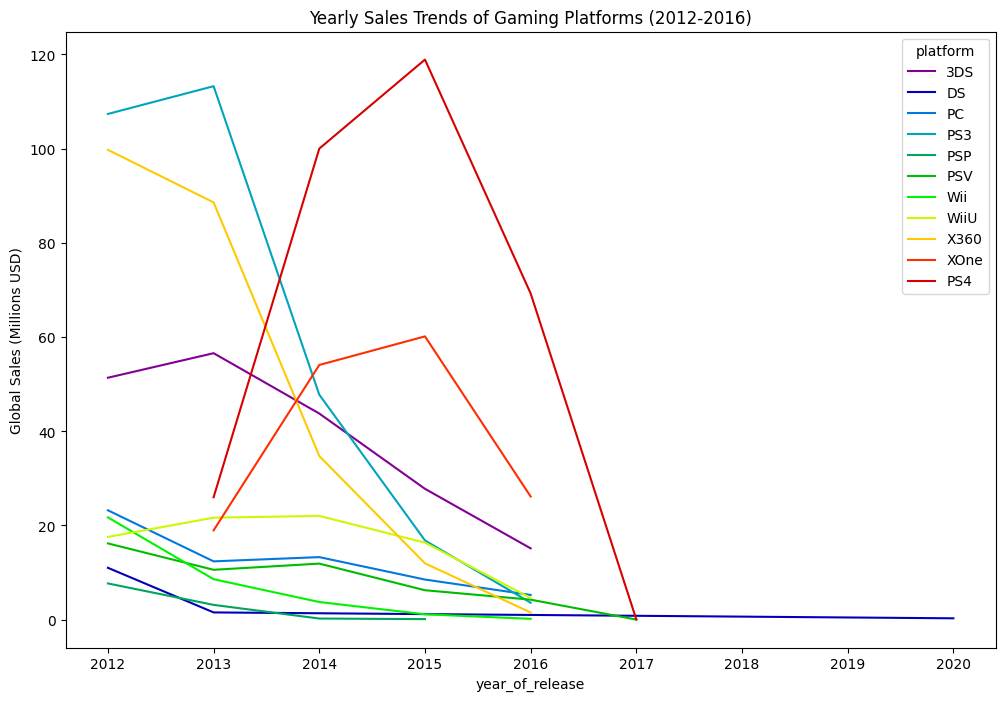

In [121]:
plt_sales_5year = df.query('year_of_release > 2011') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))  

# Create a line plot showing yearly global sales trends for selected platforms
sns.lineplot(x=plt_sales_5year.year_of_release,  # X-axis: Year of release (2012-2016)
             y=plt_sales_5year.global_sales,  # Y-axis: Global sales
             hue=plt_sales_5year.platform,  # Different lines for each platform
             legend='full',  # Display full legend
             palette='nipy_spectral');  # Use a distinct color palette

# Set labels and title
plt.ylabel('Global Sales (Millions USD)')  
plt.title('Yearly Sales Trends of Gaming Platforms (2012-2016)');  


Key Findings: Relevant Platforms (2012–2016)
PS4 and XOne are the only growing and promising platforms, showing continuous upward sales trends.
3DS still holds some residual popularity, but its sales are declining compared to the newer console generations.
Other platforms have either insignificant sales or are declining towards zero, making them irrelevant for further analysis.

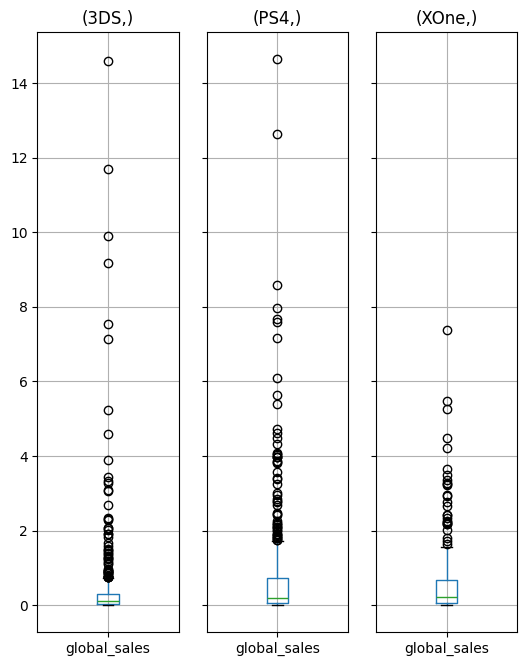

In [122]:
popular_platforms = ['PS4', 'XOne', '3DS']

df_3p = df.query('platform in @popular_platforms & year_of_release > 2011') \
          .reset_index(drop=True)

df_3p.groupby(['platform']).boxplot(column='global_sales',
                                    figsize=(6, 8),
                                    layout=(1, 3));

In [123]:
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,393.0,0.799440,1.607861,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


Sales Analysis of PS4, XOne, and 3DS
Average sales values for all three platforms are approximately the same.
A small number of hit games generate the majority of revenue, as seen from numerous outliers in the box plot.
These hit games sell 11–20 times more than the average game sales.
Platforms with the most hit games:
3DS and PS4 have more high-selling games in both quantity and sales impact.

In [124]:
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      1
PS4      0
XOne    11
Name: global_sales, dtype: int64

In [125]:
df_3p.iloc[[1, 0, 11]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
1,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
11,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


Top-Selling Games on Each Platform
PS4 & XOne: Call of Duty: Black Ops 3 (2015) is the best-selling game on both platforms.
3DS: Pokemon X/Pokemon Y (2013) is the top-selling game, reinforcing the decline in popularity of 3DS over time.
These results confirm that 3DS peaked earlier, while PS4 and XOne remained dominant in later years.

Text(0, 0.5, 'Global Sales (Million USD)')

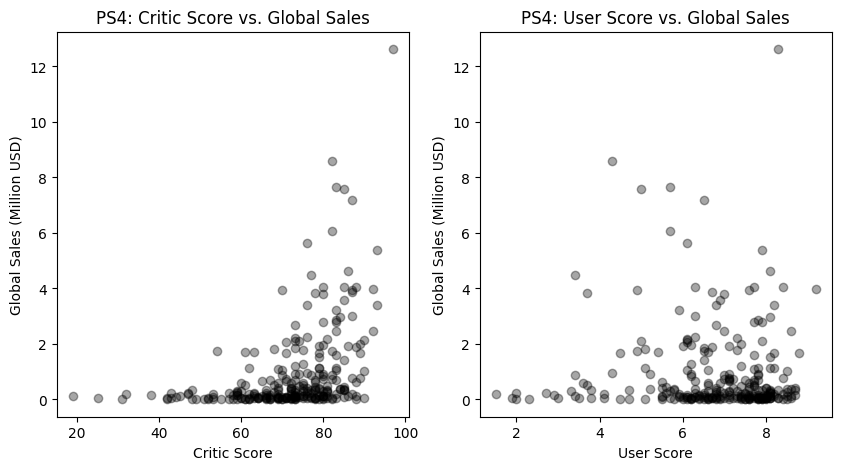

In [126]:
# Filter dataset for PS4 platform
df_ps4 = df_3p.query('platform == "PS4"')

# Create figure and subplot layout (2 scatter plots side by side)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot for Critic Score vs. Global Sales
ax1.scatter(x=df_ps4.critic_score,
            y=df_ps4.global_sales,
            alpha=0.35,  # Adjust transparency for better visualization
            color='black');
ax1.set_title('PS4: Critic Score vs. Global Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Global Sales (Million USD)')

# Scatter plot for User Score vs. Global Sales
ax2.scatter(x=df_ps4.user_score,
            y=df_ps4.global_sales,
            alpha=0.35,
            color='black');
ax2.set_title('PS4: User Score vs. Global Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Global Sales (Million USD)')


In [127]:
# Print correlation coefficients for PS4
print('PS4:')
print('Correlation between Global Sales and Critic Score:', round(df_ps4['global_sales'].corr(df_ps4['critic_score']), 3))
print('Correlation between Global Sales and User Score:', round(df_ps4['global_sales'].corr(df_ps4['user_score']), 3))


PS4:
Correlation between Global Sales and Critic Score: 0.407
Correlation between Global Sales and User Score: -0.032


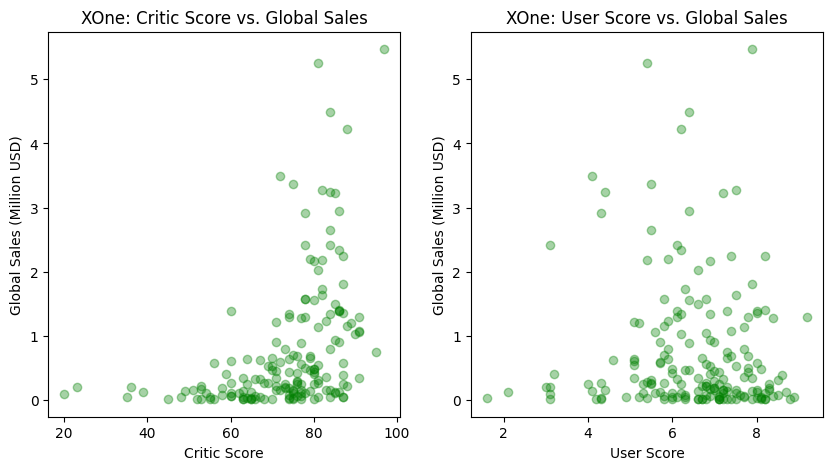

In [128]:
# Filter dataset for Xbox One platform
df_xone = df_3p.query('platform == "XOne"')

# Create figure and subplot layout (2 scatter plots side by side)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot for Critic Score vs. Global Sales
ax1.scatter(x=df_xone.critic_score,
            y=df_xone.global_sales,
            alpha=0.35,  # Adjust transparency for better visualization
            color='green');
ax1.set_title('XOne: Critic Score vs. Global Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Global Sales (Million USD)')

# Scatter plot for User Score vs. Global Sales
ax2.scatter(x=df_xone.user_score,
            y=df_xone.global_sales,
            alpha=0.35,
            color='green');
ax2.set_title('XOne: User Score vs. Global Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Global Sales (Million USD)')

plt.savefig("plots/critic_sales.png", dpi=300, bbox_inches='tight')



In [129]:
# Print correlation coefficients for XOne
print('XOne:')
print('Correlation between Global Sales and Critic Score:', round(df_xone['global_sales'].corr(df_xone['critic_score']), 3))
print('Correlation between Global Sales and User Score:', round(df_xone['global_sales'].corr(df_xone['user_score']), 3))


XOne:
Correlation between Global Sales and Critic Score: 0.417
Correlation between Global Sales and User Score: -0.069


Text(0, 0.5, 'Global Sales (Million USD)')

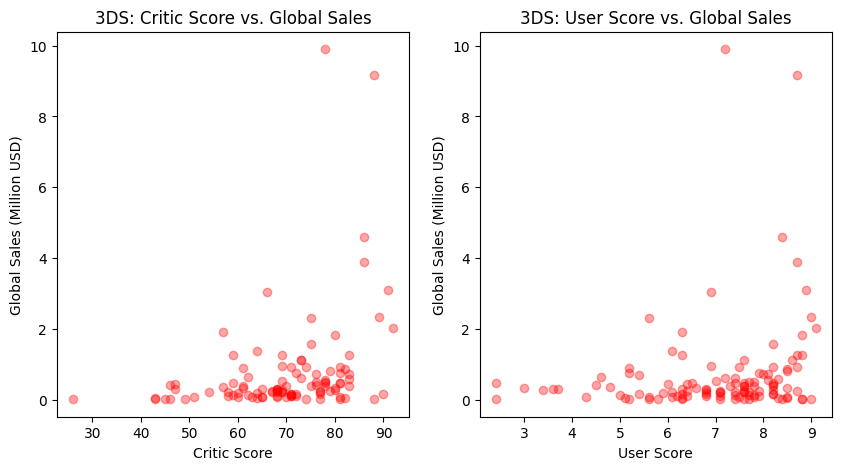

In [130]:
# Filter dataset for Nintendo 3DS platform
df_3ds = df_3p.query('platform == "3DS"')

# Create figure and subplot layout (2 scatter plots side by side)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot for Critic Score vs. Global Sales
ax1.scatter(x=df_3ds.critic_score,
            y=df_3ds.global_sales,
            alpha=0.35,  # Adjust transparency for better visualization
            color='red');
ax1.set_title('3DS: Critic Score vs. Global Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Global Sales (Million USD)')

# Scatter plot for User Score vs. Global Sales
ax2.scatter(x=df_3ds.user_score,
            y=df_3ds.global_sales,
            alpha=0.35,
            color='red');
ax2.set_title('3DS: User Score vs. Global Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Global Sales (Million USD)')


In [131]:
# Print correlation coefficients for 3DS
print('3DS:')
print('Correlation between Global Sales and Critic Score:', round(df_3ds['global_sales'].corr(df_3ds['critic_score']), 3))
print('Correlation between Global Sales and User Score:', round(df_3ds['global_sales'].corr(df_3ds['user_score']), 3))


3DS:
Correlation between Global Sales and Critic Score: 0.321
Correlation between Global Sales and User Score: 0.198


Correlation Analysis Conclusion: Sales vs. Reviews
Weak correlation between sales and critic scores:
PS4 & XOne: ~0.41
3DS: ~0.32
Very weak (almost zero) correlation between sales and user scores for all platforms.
Key Takeaways:
Critic reviews have some influence on game sales, but not a strong one.
User ratings have almost no impact on sales, suggesting that buyers may make purchasing decisions before checking user reviews.
The pattern is consistent across all platforms (PS4, XOne, and 3DS), confirming that professional reviews hold more weight than player reviews in sales performance.

/var/folders/hh/wpsjq_bj2mn1l9mxn8ywf7hm0000gn/T/ipykernel_3839/914481215.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y=genres_sales_all.genre,  # Y-axis: Game genres


Text(0.5, 1.0, 'Total Sales Distribution by Genre for PS4, XOne, and 3DS (2012–2016)')

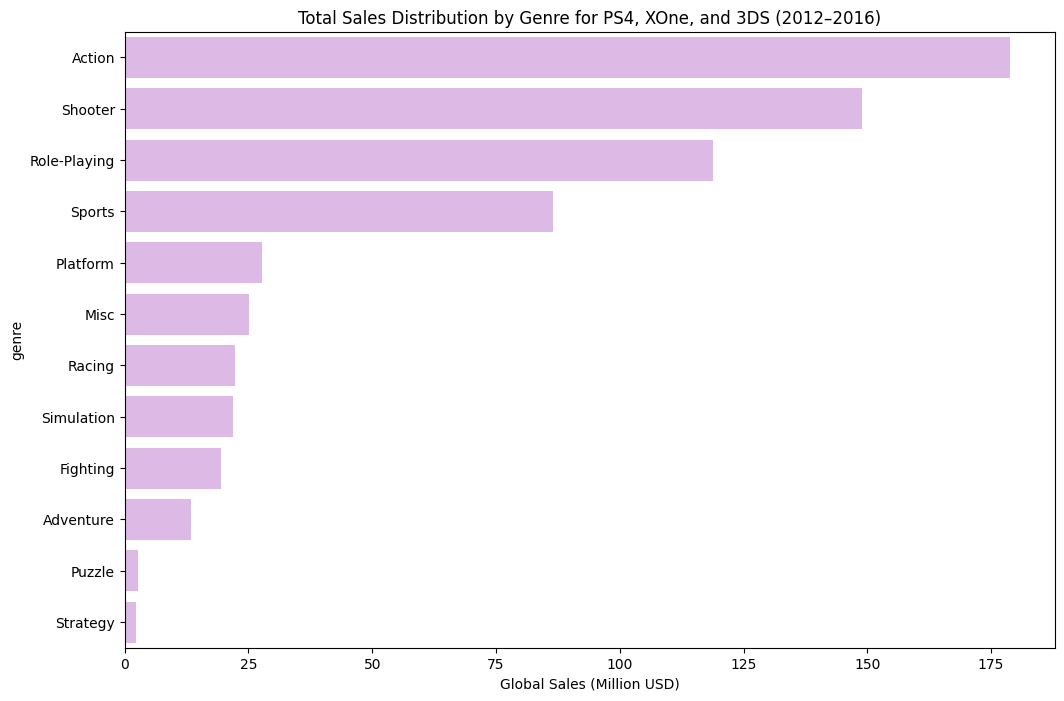

In [132]:
genres_sales_all = df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot for genre sales
ax = sns.barplot(y=genres_sales_all.genre,  # Y-axis: Game genres
                 x=genres_sales_all.global_sales,  # X-axis: Total global sales
                 orient='h',  # Horizontal bars
                 color='#e2b2ed',  # Set bar color
                 ci=None)  # Remove confidence intervals

# Labels and title
plt.xlabel('Global Sales (Million USD)')
plt.title('Total Sales Distribution by Genre for PS4, XOne, and 3DS (2012–2016)')


Top-Selling Game Genres (2012–2016) for PS4, XOne, and 3DS
Most popular genres by sales:

Action
Shooter
Role-Playing
Sports
Significant gap in sales:

The top four genres dominate total sales.
Other genres sell significantly less, with Puzzle and Strategy games having the lowest sales, up to 10x lower than the leading genres.

Text(0.5, 1.0, 'Genre Sales Distribution by Platform (PS4, XOne, 3DS) (2012–2016)')

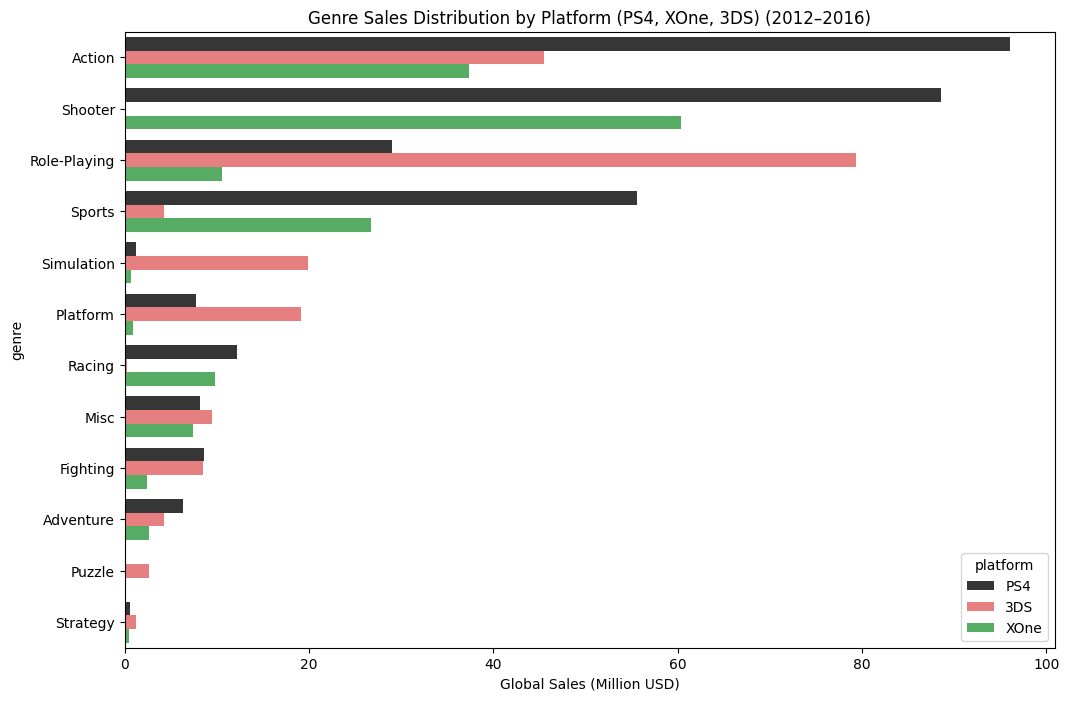

In [133]:
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with genre sales breakdown by platform
ax = sns.barplot(y=genres_sales.genre,  # Y-axis: Game genres
                 x=genres_sales.global_sales,  # X-axis: Total global sales
                 orient='h',  # Horizontal bars
                 color='#6925c2',  # Default color
                 palette=['#363636', '#f76f6f', '#49ba5a'],  # Custom colors per platform
                 hue=genres_sales.platform,  # Different colors for each platform
                 hue_order=['PS4', '3DS', 'XOne'])  # Order of platforms

# Labels and title
plt.xlabel('Global Sales (Million USD)')
plt.title('Genre Sales Distribution by Platform (PS4, XOne, 3DS) (2012–2016)')



Key Findings from Exploratory Data Analysis (EDA)
Game Release Trends:

Half of the games in the dataset were released between 2007–2016.
The gaming industry experienced peak activity in this period.
Platform Life Cycle:

The average lifespan of a gaming platform is around 6 years.
Older platforms decline as new ones gain popularity.
Top Current Platforms:

The most relevant and promising platforms for the coming years are:
PS4
XOne
3DS
These platforms have maintained strong sales in recent years.
Review Score Impact on Sales:

Critic scores weakly correlate with sales (~0.41 for PS4/XOne, ~0.32 for 3DS).
User scores have almost no correlation (~0.00), indicating reviews do not significantly influence sales.
Top-Selling Game Genres (2012–2016):

Most popular genres by sales:
Action
Shooter
Role-Playing
Sports
Least popular genres: Puzzle & Strategy (up to 10x lower sales).
Genre Preferences by Platform:

3DS users prefer Role-Playing games, while Shooters are unpopular on this platform.
Sports games are more popular on PS4 than other platforms.
Revenue Concentration:

A small number of hit games generate the majority of revenue.
Top-selling games sell 10–20x more than the average game.

In [134]:
df_4 = df[df['year_of_release'] > 2011].reset_index(drop=True)

In [135]:
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

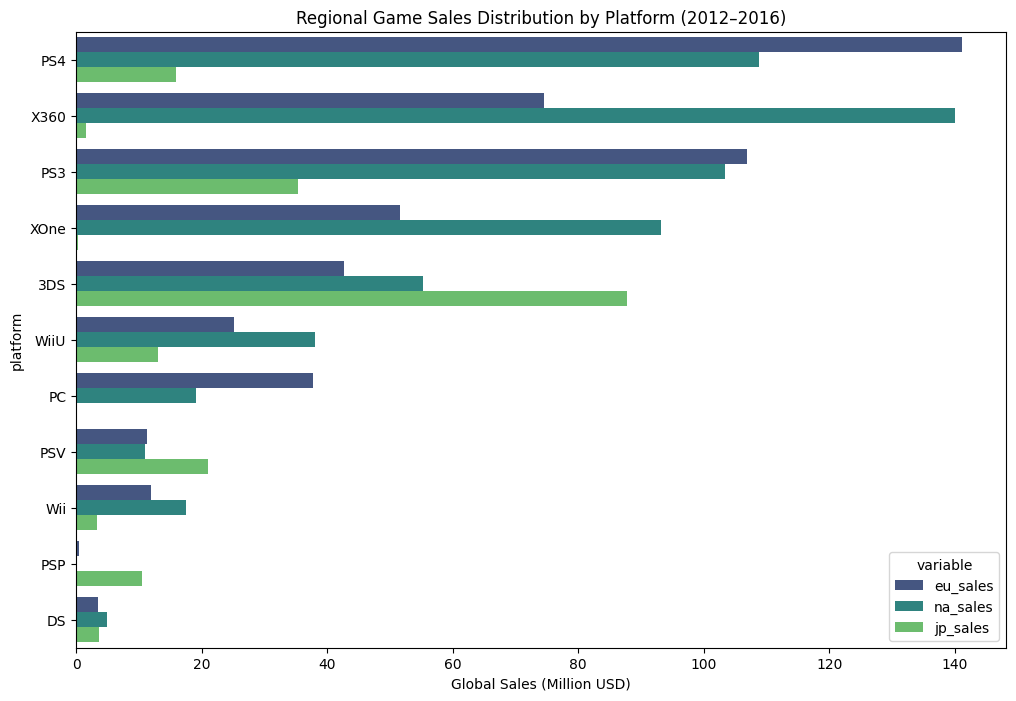

In [136]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with sales breakdown by region
ax = sns.barplot(y=df_4_region.platform,  # Y-axis: Gaming platforms
                 x=df_4_region.value,  # X-axis: Total sales
                 orient='h',  # Horizontal bars
                 color='#6925c2',  # Default bar color
                 palette='viridis',  # Use a visually distinct color scheme
                 hue=df_4_region.variable)  # Different colors for each region

# Labels and title
plt.xlabel('Global Sales (Million USD)')
plt.title('Regional Game Sales Distribution by Platform (2012–2016)')

plt.savefig("plots/Regional_game_sales_distribution.png", dpi=300, bbox_inches='tight')


Top 5 Gaming Platforms by Region (2012–2016)
Key Findings:
North America (NA):
Microsoft consoles dominate → X360 & XOne are the most popular.
Europe (EU):
Sony consoles dominate → PS4 & PS3 lead the market.
Japan (JP):
Nintendo dominates → 3DS is the most popular platform.

In [137]:
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

Text(0.5, 1.0, 'Regional Game Sales by Genre (2012–2016)')

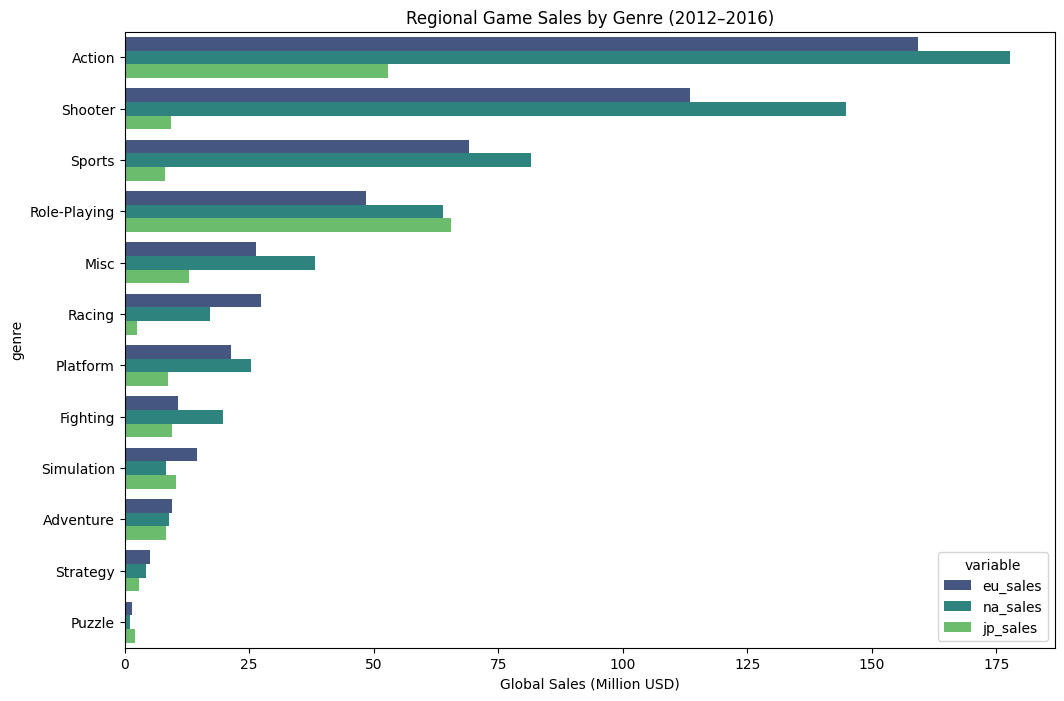

In [138]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with genre sales breakdown by region
ax = sns.barplot(y=df_4_genre.genre,  # Y-axis: Game genres
                 x=df_4_genre.value,  # X-axis: Total sales
                 orient='h',  # Horizontal bars
                 color='#6925c2',  # Default bar color
                 palette='viridis',  # Use a visually distinct color scheme
                 hue=df_4_genre.variable,  # Different colors for each region
                 hue_order=['eu_sales', 'na_sales', 'jp_sales'])  # Define region order

# Labels and title
plt.xlabel('Global Sales (Million USD)')
plt.title('Regional Game Sales by Genre (2012–2016)')


Regional Genre Preferences:
Japan:
Role-Playing (RPG) & Action are the most popular genres.
Shooters are significantly less popular compared to Europe and North America.
North America & Europe:
Shooters, Action, and Sports games dominate the market.
Market size differences:
Sales in North America & Europe are nearly equal.
Japanese market sales are more than 2x smaller compared to NA & EU.
These insights suggest that gaming companies should tailor their genre offerings based on regional preferences, particularly in Japan, where RPGs dominate.

Text(0.5, 1.0, 'Regional Game Sales by ESRB Rating (2012–2016)')

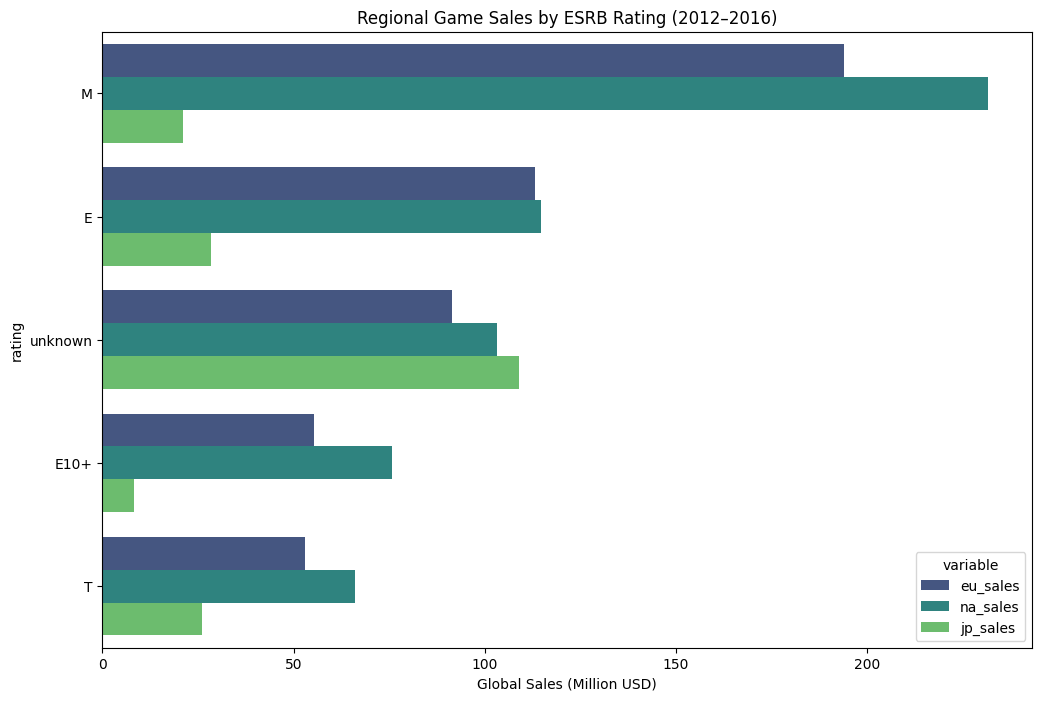

In [139]:
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with sales breakdown by ESRB rating and region
ax = sns.barplot(y=df_4_rating.rating,  # Y-axis: ESRB Ratings
                 x=df_4_rating.value,  # X-axis: Total sales
                 orient='h',  # Horizontal bars
                 color='#6925c2',  # Default bar color
                 palette='viridis',  # Use a visually distinct color scheme
                 hue=df_4_rating.variable,  # Different colors for each region
                 hue_order=['eu_sales', 'na_sales', 'jp_sales'])  # Define region order

# Labels and title
plt.xlabel('Global Sales (Million USD)')
plt.title('Regional Game Sales by ESRB Rating (2012–2016)')




Key Findings: ESRB Ratings and Regional Preferences (2012–2016)
North America (NA) & Europe (EU):

Mature (M) rated games (16+) dominate sales.
M-rated games sell 2x more than other rating categories.
Other ratings (E, T, etc.) are evenly distributed in both regions.
Japan (JP):

The most popular category is "Unknown", selling 2x more than other ratings.
This may not reflect consumer preference, but rather the fact that ESRB ratings are not widely applied in Japan.
Japan relies on its own CERO rating system, which differs from ESRB classifications.

Text(0.5, 1.0, 'Average Rating Distribution by Genre (2012–2016)')

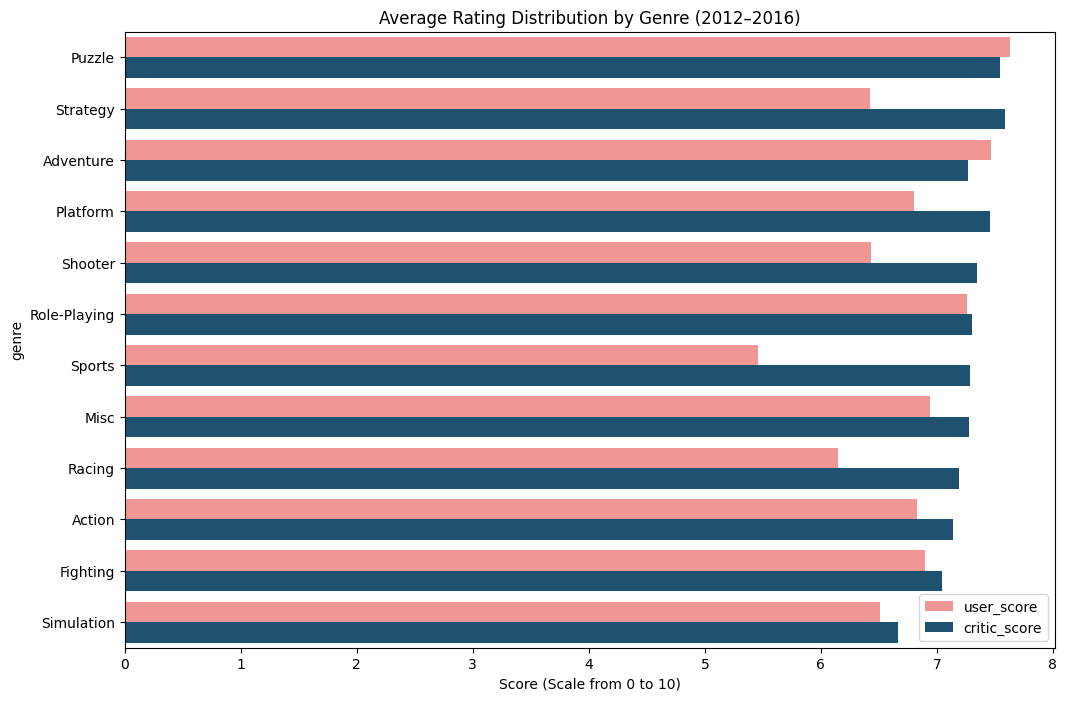

In [140]:
df_5 = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot for average genre ratings
ax = sns.barplot(y=df_5.genre,  # Y-axis: Game genres
                 x=df_5.value,  # X-axis: Average score
                 orient='h',  # Horizontal bars
                 color='#6925c2',  # Default bar color
                 palette=['#FF8785', '#10567E'],  # Different colors for user & critic scores
                 hue=df_5.variable)  # Differentiate user vs. critic scores

# Add legend and labels
ax.legend(loc='best')
plt.xlabel('Score (Scale from 0 to 10)')
plt.title('Average Rating Distribution by Genre (2012–2016)')


Key Insights: Critic vs. User Ratings by Genre (2012–2016)
Genres where critic and user ratings closely match:

Puzzle & Role-Playing games receive similar ratings from both critics and users.
Genres with the largest rating discrepancies:

Sports & Racing games → Critics rate them significantly higher than users.
Highest average critic-rated genres:

Strategy, Platform, and Puzzle games receive the best critical reception.
General trend:

Critic ratings are generally higher than user ratings across most genres.
Exceptions: Puzzle & Adventure → Users rate them slightly higher than critics.

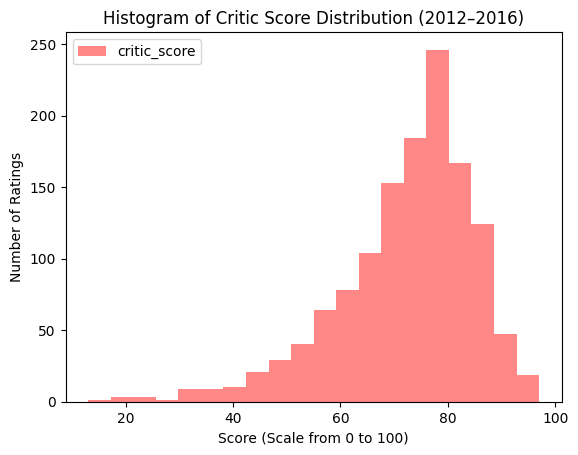

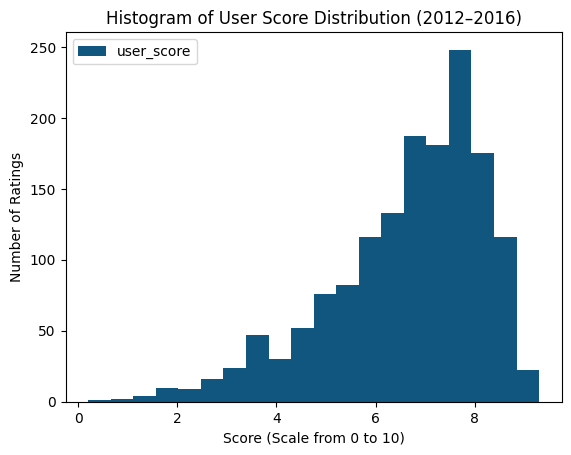

In [141]:
# Histogram for Critic Scores
df_4.plot(y='critic_score',  
          kind='hist',  
          bins=20,  # Number of bins
          color='#FF8785')  # Set color

# Labels and title
plt.legend(loc='upper left')
plt.xlabel('Score (Scale from 0 to 100)')
plt.ylabel('Number of Ratings')
plt.title('Histogram of Critic Score Distribution (2012–2016)')
plt.savefig("plots/critic_score_distribution.png", dpi=300, bbox_inches='tight')

# Histogram for User Scores
df_4.plot(y='user_score',  
          kind='hist',  
          bins=20,  
          color='#10567E')  

# Labels and title
plt.legend(loc='best')
plt.xlabel('Score (Scale from 0 to 10)')
plt.ylabel('Number of Ratings')
plt.title('Histogram of User Score Distribution (2012–2016)')

plt.savefig("plots/user_score_distribution.png", dpi=300, bbox_inches='tight')



Key Findings: Statistical Analysis of Critic & User Ratings
Critic Ratings:

Highest average ratings: Strategy games
Lowest average ratings: Simulation games
Highest rating variability: Sports games
Lowest rating variability: Puzzle games
User Ratings:

Highest average ratings: Puzzle games
Lowest average ratings: Sports games
Highest rating variability: Strategy games
Lowest rating variability: Puzzle games

In [142]:
df_5_wide = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': ['mean', 'var', 'std'],
          'user_score': ['mean', 'var', 'std']}) \
    .style.highlight_min(axis=0, color='#FFC3C2') \
    .highlight_max(axis=0, color='#D8ECC1')

df_5_wide

Key Findings: Statistical Analysis of Critic & User Ratings
Critic Ratings:

Highest average ratings: Strategy games
Lowest average ratings: Simulation games
Highest rating variability: Sports games
Lowest rating variability: Puzzle games
User Ratings:

Highest average ratings: Puzzle games
Lowest average ratings: Sports games
Highest rating variability: Strategy games
Lowest rating variability: Puzzle games


In [143]:
# Extract user scores for Xbox One and PC
sample_1 = np.asarray(df_4.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(df_4.query('platform == "PC"').user_score.to_list())

# Remove NaN values from samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

# Set significance level
alpha = 0.05  # Critical p-value threshold

# Check for equality of variances using Levene's test
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('Variances are different. Using equal_var=False')
    param = False

# Conduct independent t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

# Print p-value result
print('p-value:', results.pvalue)

# Evaluate the hypothesis
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


Variances are different. Using equal_var=False
p-value: 0.5489537965134912
Failed to reject the null hypothesis


Hypothesis 1 Conclusion: Xbox One vs. PC User Ratings
Levene’s test result: The variances of the two samples are different, so we used equal_var=False in the t-test.
T-test result (p-value = 0.5489):
Since p > 0.05, we fail to reject the null hypothesis.
This means there is no significant difference in user ratings between Xbox One and PC games.
Any observed rating differences are likely due to random variation rather than actual platform differences.
Business Implication:
Game publishers can expect similar user feedback on both PC and Xbox One for the same game titles.
Platform-specific differences (e.g., controls, graphics settings) do not significantly affect user ratings.
Developers should focus on content quality rather than platform adjustments when optimizing for these platforms.

In [144]:
# Extract user scores for Action and Sports genres
sample_1 = np.asarray(df_4.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(df_4.query('genre == "Sports"').user_score.to_list())

# Remove NaN values from samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

# Set significance level
alpha = 0.05  # Critical p-value threshold

# Check for equality of variances using Levene's test
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('Variances are different. Using equal_var=False')
    param = False

# Conduct independent t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

# Print p-value result
print('p-value:', results.pvalue)

# Evaluate the hypothesis
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


Variances are different. Using equal_var=False
p-value: 4.24307776572644e-20
Reject the null hypothesis


Overall Key Findings:
Game Industry Trends:

50% of all video games were released between 2007 and 2016.
Global game sales peaked in 2008–2009 but are now declining.
Platform Insights:

The average platform lifecycle is 7–10 years.
The most promising platforms for the near future are PS4, XOne, and 3DS.
Genre Performance:

Top 3 most popular game genres (2012–2016):
Action
Shooter
Role-Playing
Revenue is highly concentrated among a few "hit" games, which sell 10–20x more than average games.
Regional Market Differences:

NA & EU consumer profiles are similar, but Japan has unique gaming preferences:
Prefers handheld platforms (3DS).
Role-Playing games dominate.
ESRB ratings are often missing or not relevant.
Game publishers should localize products for regional preferences.
Critic & User Ratings:

Moderate correlation between critic and user scores, meaning critics and users generally agree.
Low correlation between ratings and sales, suggesting reviews do not strongly influence purchasing decisions.